##### vscode를 통해 처음 판다스를 실행했는데 내가 사용할 몇몇 모듈이 작동을 안하더라..
#### 해결방법.
1. vs코드의 python이 실행되는 위치를 찾음.
2. 그쪽에서 내가 사용할 모듈을 install.
3. (추후..) 가능할 경우 파이썬 혹은 주피터 노트북을 실행할 때 모듈 로드 경로를 바꿔줘야지..

In [7]:
# from sys import executable                                                        
# print(executable)
# !/Users/Duggubi/AppData/Local/Programs/Python/Python310/python.exe -m pip install pandas
# !/Users/Duggubi/AppData/Local/Programs/Python/Python310/python.exe -m pip install matplotlib
# !/Users/Duggubi/AppData/Local/Programs/Python/Python310/python.exe -m pip install seaborn
# 만약 나처럼 한다고 하면 1,2번째 줄을 통해 먼저 파이썬이 실행되는 곳의 경로를 찾은 후 모듈을 설치해주자.

print(3)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# done.
print('done')

3
done


프로젝트에 사용할 데이터를 한참 찾다가 지쳐서 생각을 리프레싱한 후 다른 종류의 데이터를 찾게 되었다.  
찾은 데이터의 종류는 1970년부터 2016년까지 국가별 영유아 사망률, 출산률, 소득 데이터!  
우선 분석에 앞서 설명을 먼저 적고자 한다.  
이 데이터를 뽑게 된 근거는 사람의 영유아 시기가 건강과 관련해서 정말 민감한 나이라는 것 때문이다. 

새 index추가(영양성분 관련)  

다른 문제 : 영유아 -> 일반인으로 확대할 방법? -> 신체적, 정신적 부분..? -> 
<!-- ! 아예 영유아에 초점을 맞추면 어떨까? -->
<!-- ! 함부로 내가?.. 모르겠다. 이건.. -->
<!-- 강찬석 코치님 추천.. -->
<!-- 아예 영유아를 대상으로 서비스?? 시중에 이유식이 유아 식단과 관련된 책들도 많은데 제각각 어떤거를 줘야하는지 서로 다름. -->
<!-- 아예 영유아에 대한 데이터? => 만약 유아와 관련된 데이터 자체를 찾게 된다면 그냥 그걸 분석해서 팔아도 이득일 정도...,,, 한마디로 구하는게 불가능에 가까운 수준. -->
<!-- 확실한 것은 영유아기에는 결핍과 마찬가지로 과잉도 역시 많이 안좋다는 것.(많이 예민하기 때문에 당연히 나올 수 있는 결론,,) -->
<!-- 그동안 찾은 수많은 논문에 따르면 생후 첫 6개월 동안은 되도록 모유 수유를 하는 것이 좋다고 한다.. -->
<!-- But, 그 이후는..?.. -->
문제 많음..(주석)  

### aim.
그래프를 보여주는 서비스를 만들어라.. -> 서비스 주제 : 충분한 영양 섭취를 하자.(음식/식자재? 추천.)

### 문제.

- 왜 균형잡힌 영양섭취를 해야 할까?
    1. 건강하게 살기 위해.
        - 왜 건강하게 살아야 할까?
            - 그래야 활동의 폭이 넓어져서 뭐든 할 수 있으니까(더 나은 조건으로 살 수 있으니까?).
            - 아프기 싫으니까. <!--! 여기에 초점이 맞춰짐, 그리고 정말 재일 큰 이유인듯? -->
    2. 오래 살기 위해.
        - 왜 오래 살아야 할까?
            - 인간본능.  <!-- 재미있어서일까?.. -->
    3. 무엇을 위해서?
        - 무언가의 원인 혹은 결과론적 이유.

<!-- 
- 내가 살아가는 이유..?
    - 사는 것이 즐거우니까.
        - 왜?
            - 생각하고, 고민하고, 궁리하고, 활동하고, 보고, 듣는 많은?대부분의?? 것들이 내 흥미를 끄니까. 
    - 내가 죽었을 때 눈물을 흘릴, 내가 사랑하는 사람이 있으니까.
        - 왜 중요하지?
            - 슬픔의 아득함이 무엇인지 알고 있으니까.
-->


### 가설
- 수익이 적은 나라일수록 영유아의 영양 섭취가 상대적으로 부족할 수 밖에 없고, 따라서 영아 사망률이 높게 나올 수 밖에 없다는 것!
-> 틀린 가설.

- (WANTED..) 왜 일반인들(target)이 균형잡힌 영양 섭취가 중요할까?.. 중요하지 않다. 단지 중요하게 생각하는 사람이 있을 뿐.. 당위성??.. Noob.
    - target들은 무엇을 기대하며 우리 서비스를 이용할까?
        1. 첫째로, 당연히 좋은 추천서비스.
            - 좋은 서비스의 정의는?
                - 어떤 효과를 얻을 수 있는 서비스.
                    1. (만약 경쟁자가 있다면)어떤 방면에서 더 효과적이라 입증할 수 있는, 혹은 그렇게 보이는 서비스.
                    2. (만약 경쟁자가 없다면)확실하게 효과를 얻을 수 있는 서비스.
        
        2. 둘째로, 메인이 아닌 서비스를 이용하는 사람.
            - 1번과 마찬가지.

    - 어떻게 고객을 끌어들일 수 있을까?
        1. 광고.
            - But, 현재로써는 그 수단을 이용할 방법이 없음.
        2. XXXX -- 구현에 초점을. 

<!--! 산업혁명 초기.. 발전과 기대수명의 증가는 반드시 비례하지 않음.. 
이로부터 기대수명의 증가는 최소 2차적인 요소부터 연관이 있게 됨을 알 수 있다. -->

## 사용한 데이터 및 논문의 주소
### 데이터 링크 
https://www.kaggle.com/datasets/burhanykiyakoglu/infant-mortality-fertility-income

### 논문 링크
1. 새로운 index  (X).. 
이와 관련된 어떤 논문을 찾을 수 없었으며, 여러 자료를 살펴본 결과 국가마다의 상황이 어느정도 고려되야 할 수 밖에 없지만  
기본적으로 모든 국가에서 영/유아들이 필요로 하는 대부분(모든?)의 영양소를 챙길 수 있는 환경에 있다.
(간단히, 그런 환경이 아니라면 인수밀도가 급격하게 낮아질 수 밖에 없음..feat. 알레스카 & 시베리아.) 

2. 영유아 --> 일반인으로 허들을 높일 방법?

(영아사망률 -> 기대수명률과의 높은 연관성., but 모든 계층의 사망률의 감소가 기대수명을 늘리는 것에 기여..)  
https://ourworldindata.org/child-mortality  
https://ourworldindata.org/life-expectancy  

### col설명(필요한것만)  
 
m1970, …, m2016: Mortality rate, infant (per 1,000 live births) between 1970 and 2016

 i1970, …, i2016: Adjusted net national income per capita (current US$) between 1970 and 2016

 (f1970, …, f2016: Fertility rate, total (births per woman) between 1970 and 2016) - 안씀

In [8]:
data = pd.read_csv('../../Kaggle_DB/HJ/MortalityFertilityIncome.csv', delimiter= ',')
data.head(5)

,Country Name,Country Code,Region,m1970,m1971,m1972,m1973,m1974,m1975,m1976,...,i2007,i2008,i2009,i2010,i2011,i2012,i2013,i2014,i2015,i2016
0,Aruba,ABW,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,"204,8",201,197,"193,1","188,8","184,7","180,6",...,"331,3254993","331,2271678","395,5679021","486,9793222","535,3307235","590,4566662","559,223161","548,5265822","494,2921982","489,7756091"
2,Angola,AGO,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"629,2704433","251,732843","902,6093382","1095,241414","1219,032021","1492,119826","1853,506007","2091,133487","2062,581538","1777,44841"
3,Albania,ALB,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3343,591615","3961,319155","3622,890286","3530,054028","3850,766176","3641,192766","3866,501647","3937,222372","3458,725714","3606,903851"
4,Andorra,AND,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data[['Country Name','Region','m1970', 'i1970']]

,Country Name,Region,m1970,i1970
0,Aruba,Latin America & Caribbean,NaN,NaN
1,Afghanistan,South Asia,"204,8","150,5673375"
2,Angola,Sub-Saharan Africa,NaN,NaN
3,Albania,Europe & Central Asia,NaN,NaN
4,Andorra,Europe & Central Asia,NaN,NaN
...,...,...,...,...
212,Kosovo,Europe & Central Asia,NaN,NaN
213,"Yemen, Rep.",Middle East & North Africa,"218,6",NaN
214,South Africa,Sub-Saharan Africa,NaN,NaN
215,Zambia,Sub-Saharan Africa,"108,1",NaN


통으로 삭제해도 무관하지만 데이터의 크기가 줄어드는 것이 아쉬워서 연도별 국가 데이터를 독립이라 가정,  
연도별로 데이터를 쪼갠 후 작업을 진행함.

따라서 datas[0]의 경우 1970년도 데이터,  
$0 \leq i \leq 47$의 숫자에 대하여 datas[$i$]의 경우 $1970+i$년도의 데이터를 뜻한다.

In [10]:
datas=[]

for i in range(1970,2017):
    datas.append(data[['Country Name','Region',f'm{i}',f'i{i}']])
datas[0]

,Country Name,Region,m1970,i1970
0,Aruba,Latin America & Caribbean,NaN,NaN
1,Afghanistan,South Asia,"204,8","150,5673375"
2,Angola,Sub-Saharan Africa,NaN,NaN
3,Albania,Europe & Central Asia,NaN,NaN
4,Andorra,Europe & Central Asia,NaN,NaN
...,...,...,...,...
212,Kosovo,Europe & Central Asia,NaN,NaN
213,"Yemen, Rep.",Middle East & North Africa,"218,6",NaN
214,South Africa,Sub-Saharan Africa,NaN,NaN
215,Zambia,Sub-Saharan Africa,"108,1",NaN


NaN 인 데이터의 경우 조사가 안된 케이스 이외의 다른 예외사항이 없음. infant mortality가 0이려면.... 음... 판타지로 비유했을 때  
인간이 드래곤쯤 되면 그에 수렴할꺼고, income이 0이란거는 그 나라에 소득이 없다는 소리니 모든 국민이 백수이거나 국민의 수가 0이라는 소리가 된다.  
결론은 del. 

In [23]:
for i in range(len(datas)):
    datas[i] = datas[i].dropna()

아래 2개는 데이터 확인용 예시.

In [25]:
print(datas[3].dtypes)
datas[3]

Country Name    object
Region          object
m1973           object
i1973           object
dtype: object


,Country Name,Region,m1973,i1973
1,Afghanistan,South Asia,"193,1","138,2717695"
6,Argentina,Latin America & Caribbean,"56,7","1971,027932"
10,Australia,East Asia & Pacific,"16,1","3983,550127"
11,Austria,Europe & Central Asia,23,"3336,116637"
14,Belgium,Europe & Central Asia,"17,7","4323,649878"
...,...,...,...,...
202,Uruguay,Latin America & Caribbean,"48,4","1204,978576"
203,United States,North America,"17,5","5912,942042"
206,"Venezuela, RB",Latin America & Caribbean,"44,3","1358,078848"
215,Zambia,Sub-Saharan Africa,"99,8","291,7247822"


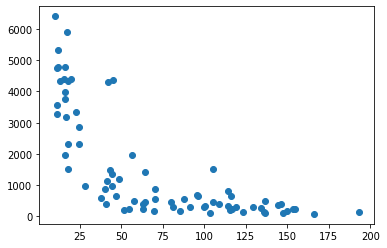

In [54]:
# example.
# datas[3]['m1973'][6].replace(',','.') 
x_val_ex = [] #infant_mortality
y_val_ex = [] #income
for i in datas[3].index:
    x_val_ex.append(float(datas[3]['m1973'][i].replace(',','.')))
    y_val_ex.append(float(datas[3]['i1973'][i].replace(',','.')))
plt.scatter(x_val_ex,y_val_ex)

그런데 이게 겁나 맘에 안든단 말이지..,,

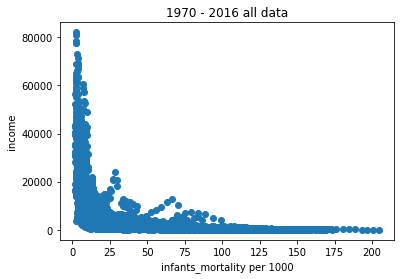

In [145]:
x_val = []
y_val = []
for i in range(len(datas)):
    for j in datas[i].index:
        x_val.append(float(datas[i][f'm{1970+i}'][j].replace(',','.')))
        y_val.append(float(datas[i][f'i{1970+i}'][j].replace(',','.')))
plt.scatter(x_val,y_val)
plt.xlabel('infants_mortality per 1000')
plt.ylabel('income')
plt.title('1970 - 2016 all data')
plt.show()

새로운 그래프를 뽑아보자.. ㅇㅅㅇ
위에서는 국가별, 연도별로 데이터를 잘게잘게 분해해서 scatter graph를 뽑았다.
이번에는?

In [58]:
data.columns

Index(['Country Name', 'Country Code', 'Region', 'm1970', 'm1971', 'm1972',
       'm1973', 'm1974', 'm1975', 'm1976',
       ...
       'i2007', 'i2008', 'i2009', 'i2010', 'i2011', 'i2012', 'i2013', 'i2014',
       'i2015', 'i2016'],
      dtype='object', length=144)

In [63]:
data['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

총 7개의 큰 지역이 있다.  

'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',  
'Europe & Central Asia', 'Middle East & North Africa',  
'East Asia & Pacific', 'North America'

역시 마찬가지로 이 지역들마다의 그래프를 뽑아보자.

In [75]:
data_split_by_region = []
for i in data['Region'].unique():
    data_split_by_region.append(data[data["Region"] == i])

for i in data_split_by_region:
    print('i.shape =',i.shape)

data_split_by_region[0].head(5)

i.shape = (42, 144)
i.shape = (8, 144)
i.shape = (48, 144)
i.shape = (58, 144)
i.shape = (21, 144)
i.shape = (37, 144)
i.shape = (3, 144)


,Country Name,Country Code,Region,m1970,m1971,m1972,m1973,m1974,m1975,m1976,...,i2007,i2008,i2009,i2010,i2011,i2012,i2013,i2014,i2015,i2016
0,Aruba,ABW,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,ARG,Latin America & Caribbean,"59,4","58,7","57,8","56,7","55,2","53,1","50,5",...,"6074,411384","7555,321873","6929,449884","8747,586438","10926,70693","11185,78485","11210,87566","10547,20618","11738,07146","10723,5525"
9,Antigua and Barbuda,ATG,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,"Bahamas, The",BHS,Latin America & Caribbean,26,"26,5","26,9","27,2","27,3","27,2",27,...,"22010,29822","21739,26845","20039,73021","19702,64889","19385,31679","26250,40882","25507,69552","25175,36885","25421,23455","24603,44141"
23,Belize,BLZ,Latin America & Caribbean,"69,9","67,4",65,"62,7","60,5","58,5","56,6",...,"3010,324122","3006,606998","3131,311036","2984,17016","3220,028656","3386,519104","3435,408215","3616,47032","3799,852311","3676,390327"


역시 아까우니까 개별 데이터로.. 그런데 배운걸로 만드는게 아니라 기억나는데로 + 검색해서 짜다보니 아오.. 귀찮다.  
추후 리펙토링을 해야겠다.

In [76]:
datas2 = []

for i in range(len(data_split_by_region)):
    d = []
    for j in range(1970,2017):
        d.append(data_split_by_region[i][['Country Name','Region',f'm{j}',f'i{j}']])
        
    datas2.append(d)

print(datas2[0][0].shape)
datas2[0][0].head(5)

(42, 4)


,Country Name,Region,m1970,i1970
0,Aruba,Latin America & Caribbean,NaN,NaN
6,Argentina,Latin America & Caribbean,"59,4","1195,191954"
9,Antigua and Barbuda,Latin America & Caribbean,NaN,NaN
20,"Bahamas, The",Latin America & Caribbean,26,NaN
23,Belize,Latin America & Caribbean,"69,9",NaN


In [83]:
for i in range(len(datas2)):
    for j in range(len(datas2[i])):
        datas2[i][j] = datas2[i][j].dropna()
datas2[0][0]

,Country Name,Region,m1970,i1970
6,Argentina,Latin America & Caribbean,"59,4","1195,191954"
25,Bolivia,Latin America & Caribbean,144,"219,0317268"
26,Brazil,Latin America & Caribbean,"102,8","399,7145944"
35,Chile,Latin America & Caribbean,"67,2","811,4296828"
41,Colombia,Latin America & Caribbean,"70,4","280,7895234"
45,Cuba,Latin America & Caribbean,38,"587,7362169"
56,Ecuador,Latin America & Caribbean,"95,7","433,9552826"
125,Mexico,Latin America & Caribbean,"77,1","612,0083451"
152,Peru,Latin America & Caribbean,"103,7","487,8347072"
195,Trinidad and Tobago,Latin America & Caribbean,"43,8","725,4623766"


조금 귀찮아졌으니 정리용으로..  
datas2는 1. Region으로 나눠짐, 각 Region 안의 값은 연도별 데이터.(1970~2017)

이제그래프를 차례대로 뽑아보자.

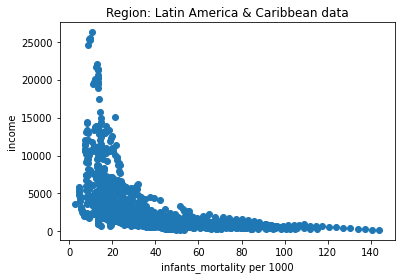

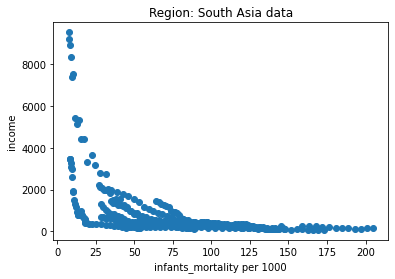

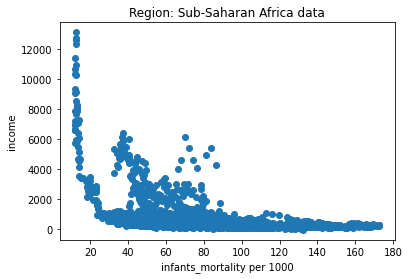

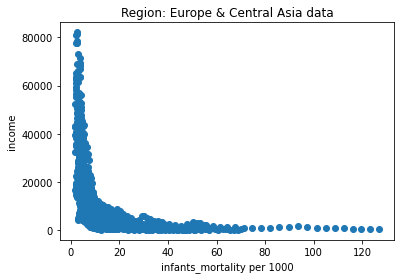

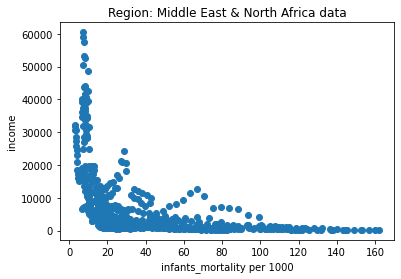

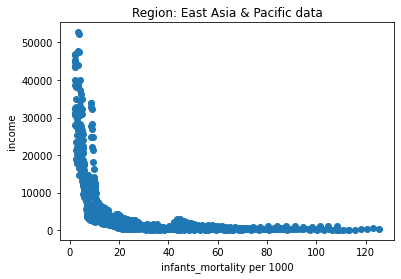

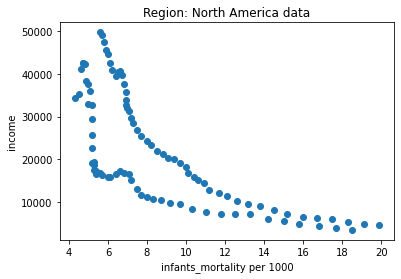

In [93]:
title_set = data['Region'].unique()
for i in range(len(title_set)):
    x_val2 = []
    y_val2 = []
    for j in range(len(datas2[i])):
        for k in datas2[i][j].index:
            x_val2.append(float(datas2[i][j][f'm{1970+j}'][k].replace(',','.')))
            y_val2.append(float(datas2[i][j][f'i{1970+j}'][k].replace(',','.')))
    plt.scatter(x_val2,y_val2)
    plt.xlabel('infants_mortality per 1000')
    plt.ylabel('income')
    plt.title(f'Region: {title_set[i]} data')
    plt.show()

.... 여전히 맘에 드는 그래프가 나오지는 않는다.  
추가로 아메리카 지역은 국가가 2개라 그래프조차 웃기다

In [94]:
datas2[6][0]

,Country Name,Region,m1970,i1970
32,Canada,North America,"18,5","3399,299037"
203,United States,North America,"19,9","4591,218634"


좀 다르게 데이터를 나눠보자..
연도별로 나눠보면?

In [96]:
data.columns

Index(['Country Name', 'Country Code', 'Region', 'm1970', 'm1971', 'm1972',
       'm1973', 'm1974', 'm1975', 'm1976',
       ...
       'i2007', 'i2008', 'i2009', 'i2010', 'i2011', 'i2012', 'i2013', 'i2014',
       'i2015', 'i2016'],
      dtype='object', length=144)

In [102]:
datas3 = []
for i in range(1970,2017):
    datas3.append([i,data[['Country Name',f'm{i}',f'i{i}']]])

datas3[0][1]

,Country Name,m1970,i1970
0,Aruba,NaN,NaN
1,Afghanistan,"204,8","150,5673375"
2,Angola,NaN,NaN
3,Albania,NaN,NaN
4,Andorra,NaN,NaN
...,...,...,...
212,Kosovo,NaN,NaN
213,"Yemen, Rep.","218,6",NaN
214,South Africa,NaN,NaN
215,Zambia,"108,1",NaN


결측치 제거

In [104]:
for i in range(len(datas3)):
    datas3[i][1] = datas3[i][1].dropna()
    
for j in datas3:
    print(f'{j[0]}년도 데이터의 길이 = {len(j[1])}')

1970년도 데이터의 길이 = 47
1971년도 데이터의 길이 = 75
1972년도 데이터의 길이 = 76
1973년도 데이터의 길이 = 77
1974년도 데이터의 길이 = 79
1975년도 데이터의 길이 = 79
1976년도 데이터의 길이 = 80
1977년도 데이터의 길이 = 80
1978년도 데이터의 길이 = 81
1979년도 데이터의 길이 = 81
1980년도 데이터의 길이 = 117
1981년도 데이터의 길이 = 120
1982년도 데이터의 길이 = 119
1983년도 데이터의 길이 = 121
1984년도 데이터의 길이 = 123
1985년도 데이터의 길이 = 126
1986년도 데이터의 길이 = 127
1987년도 데이터의 길이 = 127
1988년도 데이터의 길이 = 128
1989년도 데이터의 길이 = 133
1990년도 데이터의 길이 = 137
1991년도 데이터의 길이 = 137
1992년도 데이터의 길이 = 138
1993년도 데이터의 길이 = 144
1994년도 데이터의 길이 = 145
1995년도 데이터의 길이 = 155
1996년도 데이터의 길이 = 156
1997년도 데이터의 길이 = 160
1998년도 데이터의 길이 = 161
1999년도 데이터의 길이 = 162
2000년도 데이터의 길이 = 164
2001년도 데이터의 길이 = 167
2002년도 데이터의 길이 = 168
2003년도 데이터의 길이 = 169
2004년도 데이터의 길이 = 171
2005년도 데이터의 길이 = 171
2006년도 데이터의 길이 = 173
2007년도 데이터의 길이 = 173
2008년도 데이터의 길이 = 172
2009년도 데이터의 길이 = 171
2010년도 데이터의 길이 = 171
2011년도 데이터의 길이 = 174
2012년도 데이터의 길이 = 171
2013년도 데이터의 길이 = 171
2014년도 데이터의 길이 = 169
2015년도 데이터의 길이 = 168
2016년도 데이터의 길이 = 159


적당히 보이는것중에 2013년도 데이터가 가장 실하다. 이걸 뽑아보자.

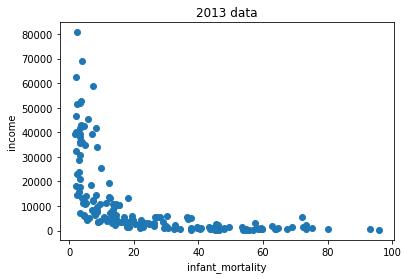

In [118]:
data_13_year = datas3[43][1]
x_2013 = list(data_13_year['m2013'])
y_2013 = list(data_13_year['i2013'])
for i in range(len(x_2013)):
    x_2013[i] = float(x_2013[i].replace(',','.'))
    y_2013[i] = float(y_2013[i].replace(',','.'))

plt.scatter(x_2013,y_2013)
plt.xlabel('infant_mortality')
plt.ylabel('income')
plt.title('2013 data')
plt.show()

냅다 점만 찍으니 뭔가 허전하다..  
기억을 되살려서 통계 그래프를 그려볼까?(한다면 내일, 4/23오후?)

#### 여튼저튼 결론
앞서 보았던 모든 그래프에서 쉽게 알 수 있듯이 국가별 소득과 영아사망률은 어느정도 반비례 관계라는 것을 쉽게 알 수 있었다.  
간단히 맨 처음 그래프에 $y = \frac{1}{x}$꼴의 선을 하나 그어보자.

In [149]:
x_max = max(x_val)
x_ind = x_val.index(x_max)
y_max = max(y_val)
y_ind = y_val.index(y_max)
print(x_val[x_ind],y_val[x_ind],'//',x_val[y_ind],y_val[y_ind])
# (96,276) & (2.3,80763)

204.8 150.5673375 // 2.5 82019.94553


In [152]:
def f(x):
    return 1/x

x = np.linspace(2,205)
y = 81800*f(x-1)+150

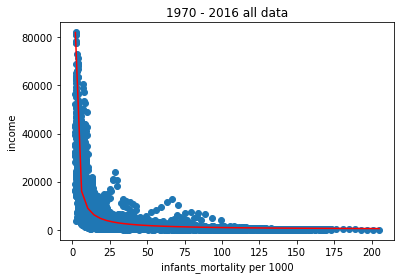

In [153]:
plt.plot(x,y,'r-')
plt.scatter(x_val,y_val)
plt.xlabel('infants_mortality per 1000')
plt.ylabel('income')
plt.title('1970 - 2016 all data')
plt.show()

그리고 그 정확한 값은 맨 처음 datas로부터 뽑은 x_val과 y_val(각각 infant_mortality와 income의 결측치를 제거한 모음)로부터..

In [154]:
np.corrcoef(x_val,y_val)

array([[ 1.        , -0.48262033],
       [-0.48262033,  1.        ]])

음... 별로 좋은 값 같지는 않다..

- 내일 aim? : 
    - 새 데이터로 의미있는 값 도출해보기....(가능할까?)